In [31]:

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse 
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix as sm
import scipy
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score


In this project, we will take use some self-defined functions to plot the 2-D K-Means.

# Import Data
In this project, we use [Wine Dataset](http://archive.ics.uci.edu/ml/datasets/Wine) to cluster different types of wines. This data set contains the results of a chemical analysis of wines grown in a specific area of Italy.

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it ):
1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline 

Variable `Label` include the true labels of different wine.

In [4]:
wine = pd.read_csv('wine.data.csv')
print(wine['Label'].unique())
wine.head()

[1 2 3]


,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# True labels
label = wine['Label']
del wine['Label']
# Data description
print("Types of variables:\n",wine.dtypes)

wine.describe()

Types of variables:
 Alcohol                 float64
Malic acid              float64
Ash                     float64
Alcalinity of ash       float64
Magnesium                 int64
Total phenols           float64
Flavanoids              float64
Nonflavanoid phenols    float64
Proanthocyanins         float64
Color intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


From the table above we can get that there are 178 instances of wine and 13 attributes and for each attribute, the distribution differ a lot. Then we are going to plot the scatter plot of the dataset `wine` as follow:

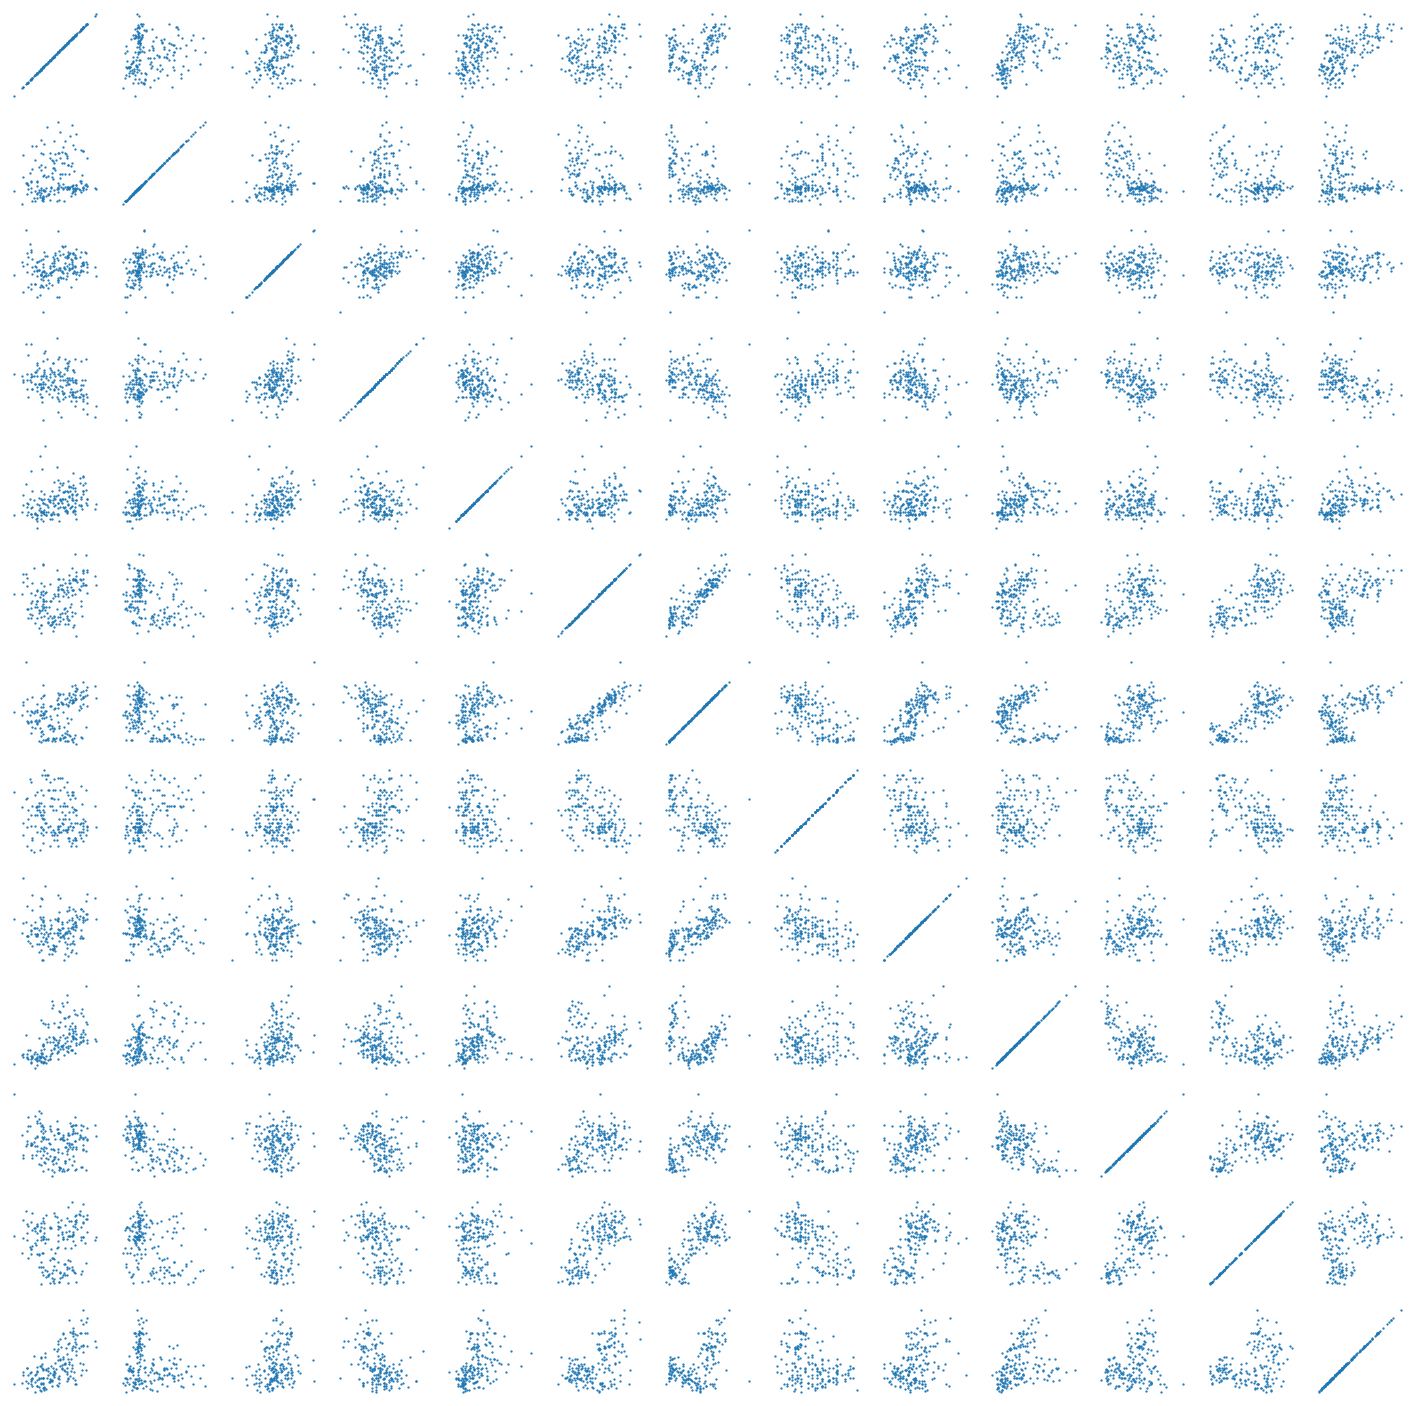

In [14]:
# Scatter plot
atts = 13
fig, axes = plt.subplots(nrows=atts, ncols=atts, figsize=(18,18), dpi = 100)

for x in range(atts):
    for y in range(atts):
        xVal = wine.iloc[:,x]
        yVal = wine.iloc[:,y]
        #axes[y][x].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        #axes[y][x].tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
        axes[y][x].axis('off')
        axes[y][x].scatter(xVal,yVal, s=0.4)


From the scatter plot, it's hard for us to cluster the data.

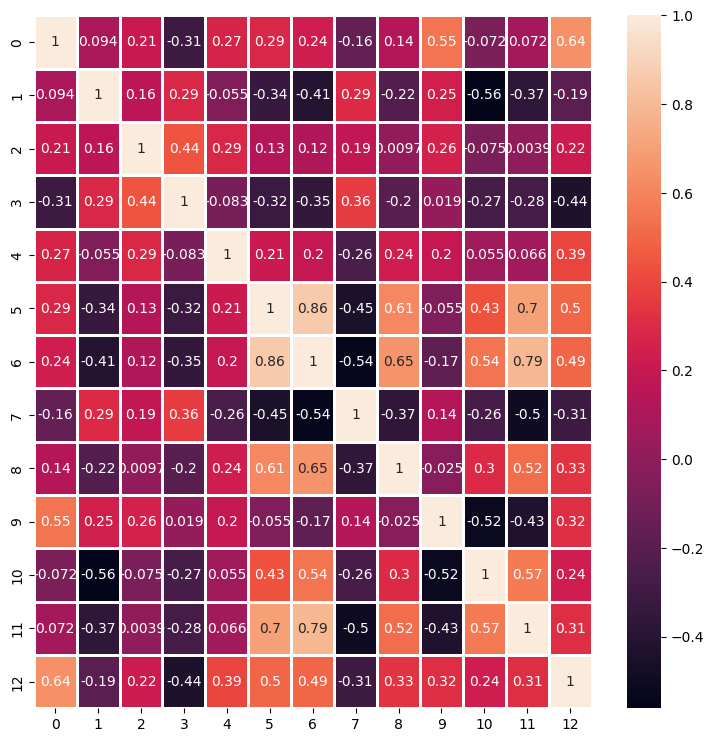

In [15]:
# Correlation Heatmap
correlation = np.zeros((atts,atts))
for x in range(atts):
    xVal = wine.iloc[:,x]
    for y in range(atts):    
        yVal = wine.iloc[:,y]
        correlation[y][x] = scipy.stats.pearsonr(xVal, yVal).correlation

        
plt.subplots(figsize = (9,9))
heatmap = sns.heatmap(correlation, linewidth=1, annot=True)
plt.show()

From the heatmap above, we can conclude that the correlation between

* "Flavanoids" and "Total phenols" (`0.86`);
* "OD280" and "Flavanoids" (`0.79`);
* "OD280" and "Total phenols" (`0.7`);

are large.

Then we can plot the regression of "Flavanoids" on "Total phenols" as follow:

0.5417062307556872 1.195844339262574 0.8645635000951147


Text(0, 0, 'Linear Regression Equation: y = 0.542x + 1.196')

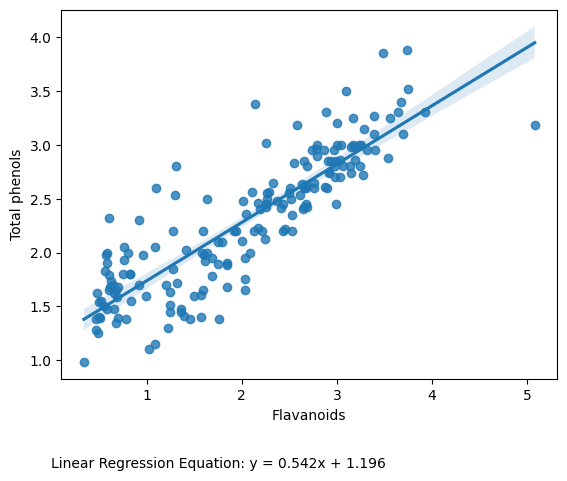

In [16]:
xVal = wine.iloc[:,6]
yVal = wine.iloc[:,5]
sns.regplot(x=xVal, y=yVal)

grad, yIntercept, r, p, std = scipy.stats.linregress(x=xVal, y=yVal)
print(grad, yIntercept, r)

plt.text(0,0,'Linear Regression Equation: y = ' + str(round(grad,3)) + 'x + ' + str(round(yIntercept,3)))

# [K-Means Clustering](https://en.wikipedia.org/wiki/K-means_clustering)


In [17]:
!pip show seaborn
!pip show matplotlib

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Program Files\Python311\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Program Files\Python311\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: ipympl, seaborn


## K-Means

In [32]:
scaling = StandardScaler()
scaling.fit(wine)
scaled_data = scaling.transform(wine)

data = PCA(n_components=13)
data.fit(scaled_data)
data = data.transform(scaled_data)

KM = KMeans(3, init='k-means++').fit(data)
res = KM.predict(data)


label_pred_KM = res
print("Labels predicted by K-Means:",label_pred_KM)
print('Length of labels is same as data entry', label_pred_KM.shape)

centroids_KM= KM.cluster_centers_
print("Shape of centroids_KM",centroids_KM.shape)
print("Centroids:",centroids_KM)


inertia_KM = KM.inertia_
print("Inertia:",inertia_KM)


Labels predicted by K-Means: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 0 2 2 1 0 1 2 2 0
 0 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Length of labels is same as data entry (178,)
Shape of centroids_KM (3, 13)
Centroids: [[ 2.26790262e+00 -8.14930315e-01 -9.00477766e-02 -7.60769440e-02
  -8.56455759e-02  9.03255540e-02 -1.36591025e-01  6.31118724e-02
  -1.01484764e-02 -2.84410102e-02  6.17890667e-02  4.75134340e-02
  -1.31941774e-02]
 [-2.61349653e+00 -1.12477055e+00 -2.46558136e-01 -2.53867832e-04
   1.88778085e-02  1.26790263e-02  1.11244802e-01 -9.25659126e-03
   2.51900652e-02  4.72347006e-03 -6.09569080e-02 -1.75489872e-02
  -4.23559096e-02]
 [-1.47461387e-01  1.97453466e+00  3.32022286e-01  8.68066753e-02
   7.98828681e-02 -1.1

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We can plot the pairwise relationships of `winenorm` with the colored label predicted bt K-Means method.

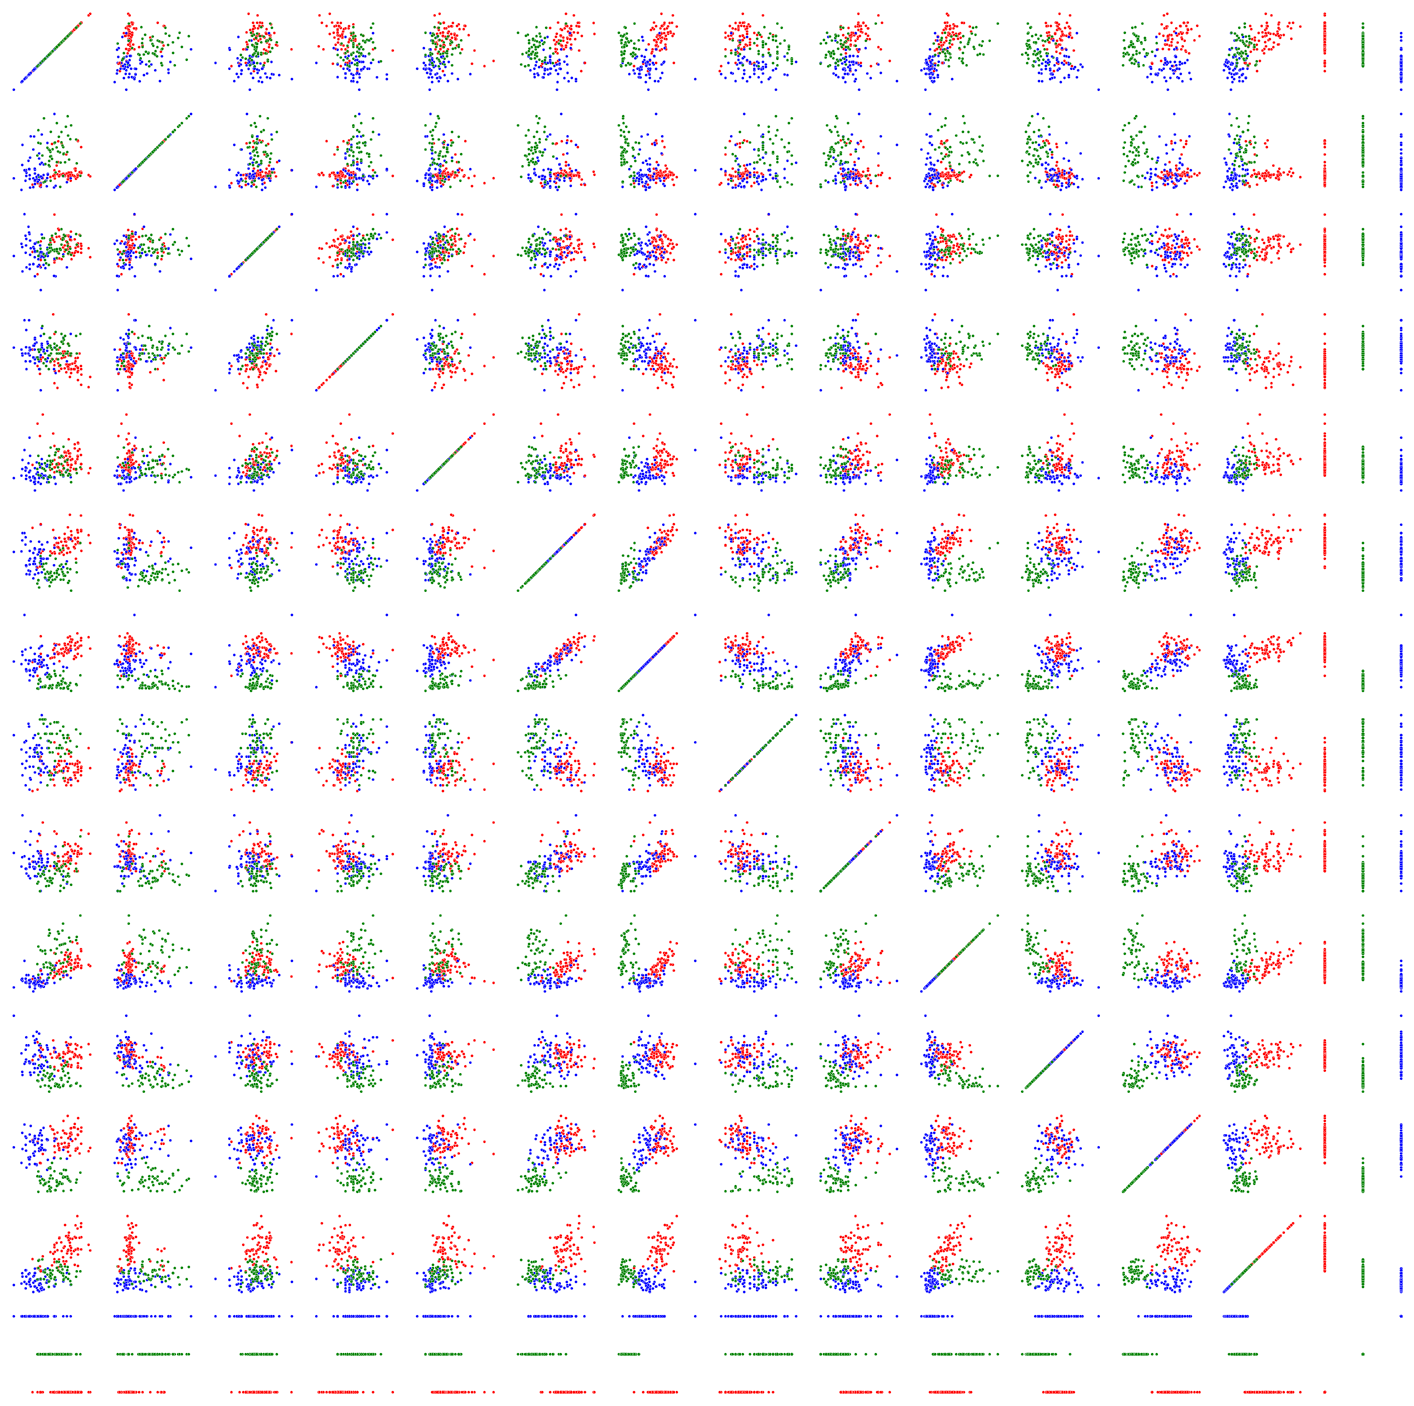

In [33]:
# Pairplot
wine["cluster"] = label_pred_KM


# Scatter plot
atts = 14
fig, axes = plt.subplots(nrows=atts, ncols=atts, figsize=(18,18), dpi = 100)

for x in range(atts):
    for y in range(atts):
        xVal = wine.iloc[:,x]
        yVal = wine.iloc[:,y]
        axes[y][x].axis('off')
        sns.scatterplot(data=wine, x=xVal,y=yVal, hue = wine['cluster'], ax=axes[y][x], legend=False, s=4, palette=['r','g','b'])


In [34]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


C:\Program Files\Python311\Lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


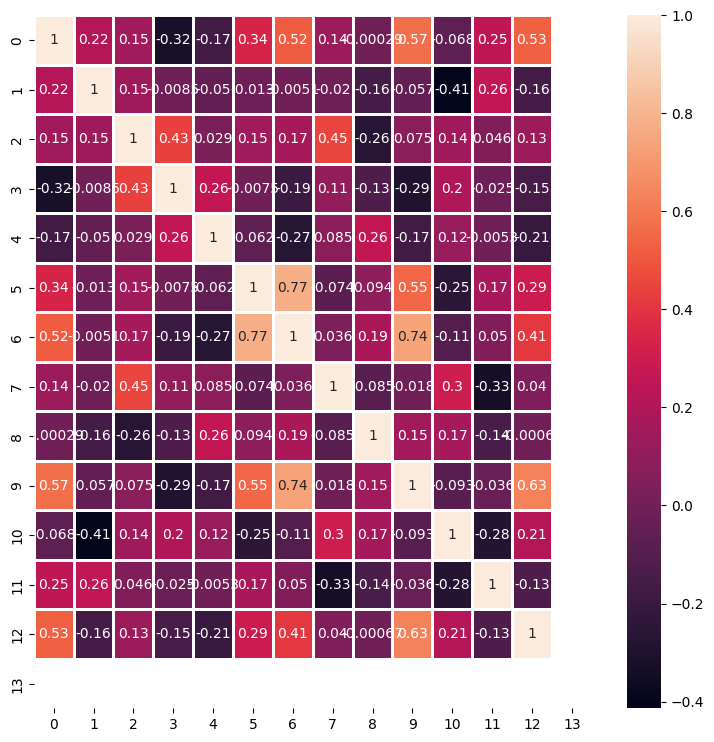

In [35]:
#Visualize the correlation matrix for alcohols in cluster 1
...
atts = 14
wineFirstCluster = wine[wine['cluster'] == 0]

# Correlation Heatmap
correlation = np.zeros((atts,atts))
for x in range(atts):
    xVal = wineFirstCluster.iloc[:,x]
    for y in range(atts):    
        yVal = wineFirstCluster.iloc[:,y]
        correlation[y][x] = scipy.stats.pearsonr(xVal, yVal).correlation

        
plt.subplots(figsize = (9,9))
heatmap = sns.heatmap(correlation, linewidth=1, annot=True)

plt.show()

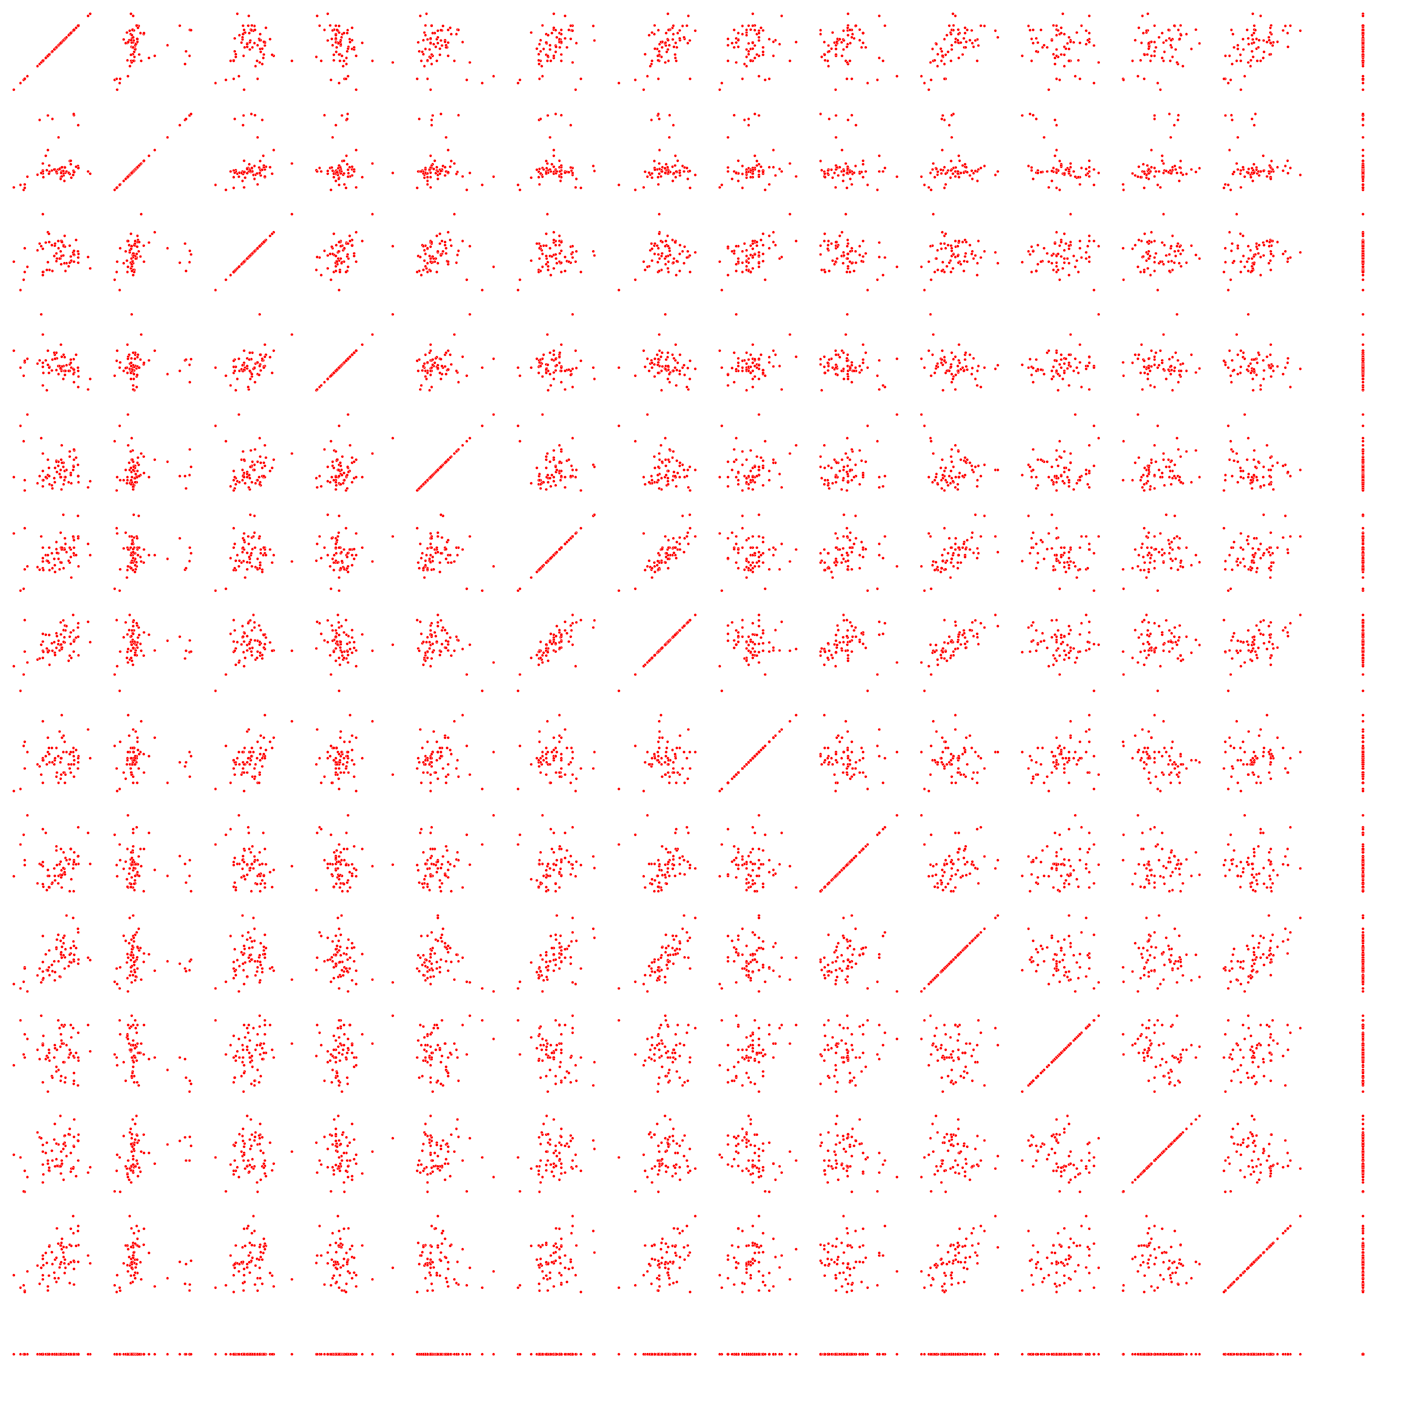

In [38]:
# Scatter plot
atts = 14
fig, axes = plt.subplots(nrows=atts, ncols=atts, figsize=(18,18), dpi = 100)

for x in range(atts):
    for y in range(atts):
        xVal = wineFirstCluster.iloc[:,x]
        yVal = wineFirstCluster.iloc[:,y]
        axes[y][x].axis('off')
        sns.scatterplot(data=wineFirstCluster, x=xVal,y=yVal, hue = wineFirstCluster['cluster'], ax=axes[y][x], legend=False, s=4, palette=['r'])

In [39]:
# Because of the small dataset, there is no reason to reduce the dimensionality of the data because it only marginally improves compute time. 
# PCA is necessary to maximse the distinction between the different types of alcohol against all of the components otherwise the clusters blur together and the prediction quality of the K-Means Cluster is significantly reduced.

print(adjusted_rand_score(label,label_pred_KM))

0.7867076926817219
